In [1]:
%load_ext autoreload
%autoreload 2


import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'
sys.path.insert(0, '../src/TrackingMoCap/Tracking')

from TrackingMoCap.Tracking import compute_marker_distances

In [6]:
pwd

'/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/002_Projects/FinchFlight/TrackingMoCap/notebooks'

In [ ]:
trajectories_df = pd.read_csv('../data/raw/trajectories_df-20240514.csv',
                              index_col=0,
                              dtype = {'FlightID': str, 'Bird': str, 'Age': int,
                                       'Category':str,'Iteration':int,'Time':float,
                                       'Frame': int,'X':float,'Y':float,'Z':float})   



In [ ]:
trajectories_df['FrameID'] = trajectories_df['FlightID'] + '_f' + trajectories_df['Frame'].astype(str).str.zfill(3)


In [ ]:
sub_df = trajectories_df[trajectories_df.Category == 'Pre-wind']
sub_df

,FlightID,Bird,Age,Category,Iteration,Marker,Time,Frame,X,Y,Z,BirdID,Brood,Order,Mass_40,Chord_40,FrameID
23520,0201040LN01,purpleR,40,Pre-wind,1,0,0.008333,1,70.326300,1034.77530,1179.2844,201,B,1,17.2,58.5,0201040LN01_f001
23521,0201040LN01,purpleR,40,Pre-wind,1,0,0.016667,2,69.573630,1034.69350,1184.2308,201,B,1,17.2,58.5,0201040LN01_f002
23522,0201040LN01,purpleR,40,Pre-wind,1,0,0.025000,3,69.099205,1034.85620,1188.9563,201,B,1,17.2,58.5,0201040LN01_f003
23523,0201040LN01,purpleR,40,Pre-wind,1,0,0.033333,4,68.577840,1035.16020,1193.6866,201,B,1,17.2,58.5,0201040LN01_f004
23524,0201040LN01,purpleR,40,Pre-wind,1,0,0.041667,5,68.079130,1035.46830,1198.1075,201,B,1,17.2,58.5,0201040LN01_f005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231021,1602040LN24,pinkR-turquoiseL,40,Pre-wind,24,4,3.966667,476,-18.025013,-335.56950,1439.7946,1602,F,2,15.2,60.0,1602040LN24_f476
9231022,1602040LN24,pinkR-turquoiseL,40,Pre-wind,24,4,3.975000,477,-17.708857,-334.03757,1440.6256,1602,F,2,15.2,60.0,1602040LN24_f477
9231023,1602040LN24,pinkR-turquoiseL,40,Pre-wind,24,4,3.983333,478,-17.243382,-332.11694,1442.1188,1602,F,2,15.2,60.0,1602040LN24_f478
9231024,1602040LN24,pinkR-turquoiseL,40,Pre-wind,24,4,3.991667,479,-16.730790,-329.90800,1443.1950,1602,F,2,15.2,60.0,1602040LN24_f479


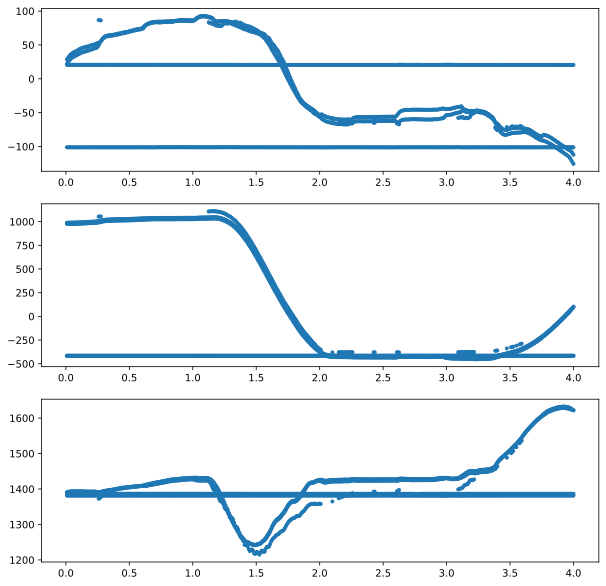

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10,10))



current_sequence = sub_df[sub_df.FlightID == '0601040LN10']
ax[0].plot(current_sequence.Time, current_sequence.X, '.', label='0601040LN10')
ax[1].plot(current_sequence.Time, current_sequence.Y, '.', label='0601040LN10')
ax[2].plot(current_sequence.Time, current_sequence.Z, '.', label='0601040LN10')


plt.show()

In [ ]:
print(current_sequence.head())

coords = current_sequence[['X','Y','Z']].values
print(coords.shape)

frames = current_sequence['Frame'].values
print(type(frames))

            FlightID          Bird  Age  Category  Iteration  Marker  \
3464160  0601040LN10  blackR-navyL   40  Pre-wind         10       0   
3464161  0601040LN10  blackR-navyL   40  Pre-wind         10       0   
3464162  0601040LN10  blackR-navyL   40  Pre-wind         10       0   
3464163  0601040LN10  blackR-navyL   40  Pre-wind         10       0   
3464164  0601040LN10  blackR-navyL   40  Pre-wind         10       0   

             Time  Frame          X          Y          Z  BirdID Brood  \
3464160  0.008333      1  20.709948 -417.00928  1386.5704     601     I   
3464161  0.016667      2  20.707302 -417.00900  1386.5759     601     I   
3464162  0.025000      3  20.694717 -417.01900  1386.5719     601     I   
3464163  0.033333      4  20.696653 -417.01935  1386.5773     601     I   
3464164  0.041667      5  20.699976 -417.01373  1386.5815     601     I   

         Order  Mass_40  Chord_40           FrameID  
3464160      1     16.8      61.0  0601040LN10_f001  
3464161 

In [2]:


marker_distances, start_frame_indices, end_frame_indices = compute_marker_distances(coords, frames,[10])

NameError: name 'compute_marker_distances' is not defined